In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# NBA player information
players = pd.read_csv('../data/Players.csv')
# Statistics of each shot in the 2014-2015 NBA season
shotLogs = pd.read_csv('../data/shot_logs.csv')

# Delete pointless column that was only storing the row number.
del players['Unnamed: 0']

In [14]:
players.head(3)

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN


In [15]:
shotLogs.head(3)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148


In [16]:
# -----------------------------------------------------------------------------------------------------
# -------------------------------- Merge, format, and correct data sets -------------------------------
# -----------------------------------------------------------------------------------------------------

# Format the 'CLOSEST_DEFENDER' column in the shotLogs dataframe to be "FirstName LastName" instead of
# "LastName, FirstName" so that it matches the format of the players dataframe.
shotLogs['CLOSEST_DEFENDER'] = shotLogs['CLOSEST_DEFENDER'].str.split(', ').str[::-1].str.join(' ')

# Make the names of all players in the shotLogs and players dataframes lowercase to facilitate merging.
shotLogs['CLOSEST_DEFENDER'] = shotLogs['CLOSEST_DEFENDER'].str.lower()
players['Player'] = players['Player'].str.lower()


# ------------------------------------ Add the Shooter's statistics ------------------------------------

# Insert statistics and information about the shooter into the shotlog dataframe.
shotLogs = shotLogs.merge(players, how='inner', left_on='player_name', right_on='Player')

# Delete duplicate column. The player_name column has the same information.
del shotLogs['Player']

# Clarify that the statistics and information that was just inserted was associated with the shooter.
shotLogs.rename(
    columns = {
        'player_name': 'shooter',
        'height': 'shooter_height',
        'weight': 'shooter_weight',
        'collage': 'shooter_college',
        'born': 'shooter_born',
        'birth_city': 'shooter_birth_city',
        'birth_state': 'shooter_birth_state',
    },
    inplace = True
)

# -----------------------------------------------------------------------------------------------------

# Get rid of instances where the time the player was touching the ball is less than zero
shotLogs = shotLogs[shotLogs.TOUCH_TIME > 0]

# -----------------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------------

# Corrected shotLogs with Shooter information added
shotLogs.head(3)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,shooter,player_id,shooter_height,shooter_weight,shooter_college,shooter_born,shooter_birth_city,shooter_birth_state
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,alan anderson,101187,1.3,1,2,brian roberts,203148,185.0,78.0,University of Dayton,1985.0,Toledo,Ohio
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,bojan bogdanovic,202711,6.1,0,0,brian roberts,203148,185.0,78.0,University of Dayton,1985.0,Toledo,Ohio
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,bojan bogdanovic,202711,0.9,0,0,brian roberts,203148,185.0,78.0,University of Dayton,1985.0,Toledo,Ohio


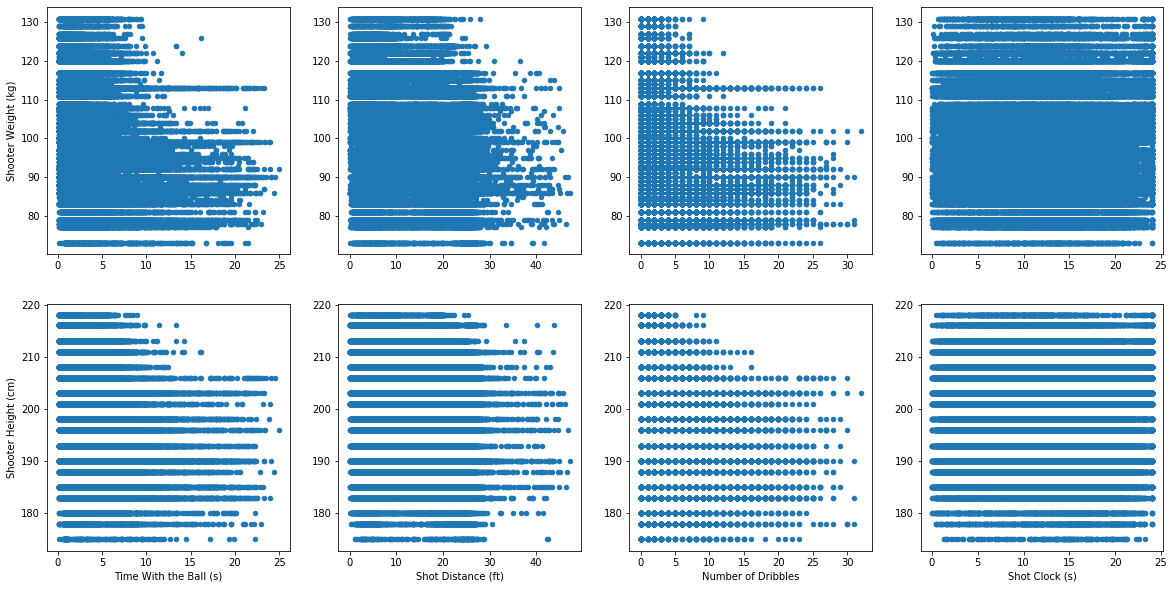

In [17]:
# I wasnt to display the shooting tendencies of players based on their height/weight. To do this, I will
# plot Shooter height and weight vs. the amount of time the player has the ball before shooting, the distance
# of the shot, how many dribbles before they shot, and the time on the shot clock when the ball was shot.

fig, axes = plt.subplots(2, 4)
shotLogs[['TOUCH_TIME', 'shooter_weight']].plot.scatter(x='TOUCH_TIME', y='shooter_weight', ax = axes[0, 0])
shotLogs[['TOUCH_TIME', 'shooter_height']].plot.scatter(x='TOUCH_TIME', y='shooter_height', ax = axes[1, 0])
shotLogs[['SHOT_DIST', 'shooter_weight']].plot.scatter(x='SHOT_DIST', y='shooter_weight', ax = axes[0, 1])
shotLogs[['SHOT_DIST', 'shooter_height']].plot.scatter(x='SHOT_DIST', y='shooter_height', ax = axes[1, 1])
shotLogs[['DRIBBLES', 'shooter_weight']].plot.scatter(x='DRIBBLES', y='shooter_weight', ax = axes[0, 2])
shotLogs[['DRIBBLES', 'shooter_height']].plot.scatter(x='DRIBBLES', y='shooter_height', ax = axes[1, 2])
shotLogs[['SHOT_CLOCK', 'shooter_weight']].plot.scatter(x='SHOT_CLOCK', y='shooter_weight', ax = axes[0, 3])
shotLogs[['SHOT_CLOCK', 'shooter_height']].plot.scatter(x='SHOT_CLOCK', y='shooter_height', ax = axes[1, 3])

axes[0, 0].set(xlabel="", ylabel="Shooter Weight (kg)")
axes[1, 0].set(xlabel="Time With the Ball (s)", ylabel="Shooter Height (cm)")
axes[0, 1].set(xlabel="", ylabel="")
axes[1, 1].set(xlabel="Shot Distance (ft)", ylabel="")
axes[0, 2].set(xlabel="", ylabel="")
axes[1, 2].set(xlabel="Number of Dribbles", ylabel="")
axes[0, 3].set(xlabel="", ylabel="")
axes[1, 3].set(xlabel="Shot Clock (s)", ylabel="")
fig.set_size_inches(20, 10)
plt.show()

# Discoveries:
# 1. A heavier shooter tends to have the ball for less time, dribble less before shooting, and shoot from slightly
# closer in.
# 2. A taller shooter also seems to have the ball for less time and take fewer dribbles, but the shot distance does
# not seem to be correlated.
# 3. Height/weight does not correlate with shot clock.

# Conclusions:
# Coaches could use this data to predict when players of certain height will shoot the ball, how willing they are
# to shoot from long range, and how many dribbles the player will likely take before shooting. This could be used
# to create baseline defensive strategies for coaches who do not have scouting information on particular players.
# Here are some possible strategies:
#  - Have defenders double-team other players if they know that the person they are guarding is unlikely to shoot
#    a long range shot
#  - Force taller players into situations where they have to dribble the ball, since they do not do it as often
#  - Quicklt bring in extra defenders on taller players, since they are more likely to shoot quickly